In [1]:
import h5py
import numpy as np
import matplotlib.pylab as plt

In [2]:
#Gain access to the data.
#Note: This does *not* load the entire data set into memory.
dset = h5py.File("dataset_test.h5","r")

#Access to the input data
RGB = dset["RGB"]
NIR = dset["NIR"]
#The data has the following size
np.shape(RGB)

(3, 10980, 10980, 3)

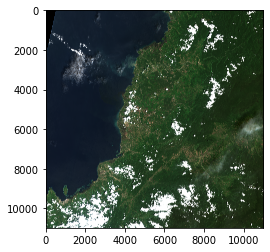

In [3]:
#The dataset contains 3 images with a size of 10980x10980.
#For example, we can also display the first image.
plt.imshow(RGB[0])
plt.show()
# Please note that this will load the entire image into memory.

In [3]:
#Let's create an input-label pair:
#first the input by concatenating the RGB and NIR channels.
input_image = np.concatenate([RGB,np.expand_dims(NIR,axis=-1)],axis=-1)
print(np.shape(input_image))

(3, 10980, 10980, 4)


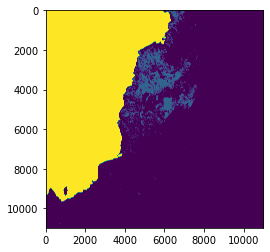

In [4]:
GT = dset["GT"]
#The array GT contains the values 0 = background, 1 = palm oil and 99 = no data.

#Let's visualize this array.
#Note that 99 is assigned to 3 for visualization only.
#-> 99 (3) means that there is no data.
first_gt_image = np.where(GT[0]==99,3,GT[0])
plt.imshow(first_gt_image)
plt.show()

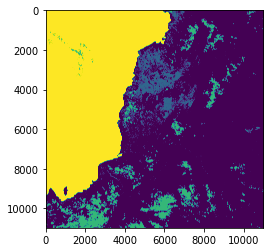

In [5]:
#You can see that palm oil trees are also assigned to the parts that are occluded by clouds.
#Therefore, wherever there is a cloud, we assign the label 2.
CLD = dset["CLD"]
cloud_positions = np.where(CLD[0] > 10)
first_gt_image[cloud_positions] = 2
# lets now print the complete label image
plt.imshow(first_gt_image)
plt.show()

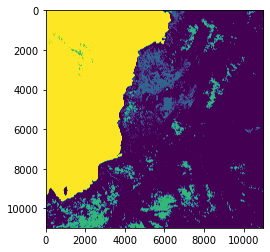

In [6]:
#The label image and the input image still do not match perfectly.
#There are parts in the input image that do not contain data.
#We remove them from the input:
idx = np.where(np.max(input_image[0], axis=-1) == 0)
first_gt_image[idx] = 3
plt.imshow(first_gt_image)
plt.show()

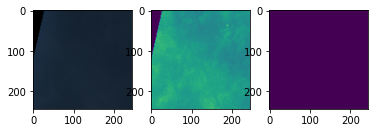

In [7]:
#Finally we can draw a small input window and the corresponding label data
f, axarr = plt.subplots(ncols=3, nrows=1)
axarr[0].imshow(input_image[0,384:628,384:628, :3]) #RGB
axarr[1].imshow(input_image[0,384:628,384:628, -1]) #NIR
axarr[2].imshow(first_gt_image[384:628,384:628])
plt.show()

Ab hier mein Code

In [132]:
# https://www.datarmatics.com/data-science/logistic-regression-in-python-with-the-titanic-dataset/
# import 
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.metrics import confusion_matrix

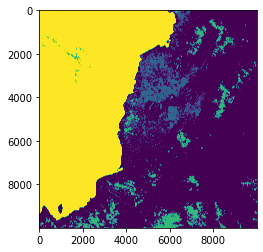

In [126]:
# create test batches 
# create test batches of the size of 50 x 50 pixels
# between 10000 and 10500
#only first layer --> later in the correct pipeline only one layer is needed as input

startPixel =  0
endPixel = 10000
batchSize = 50

plt.imshow(first_gt_image[startPixel:endPixel, startPixel:endPixel])
plt.show()

In [127]:
temp = np.asarray(input_image[0,startPixel:startPixel+50,startPixel:startPixel+50,1])
temp.shape

(50, 50)

In [128]:

#coordinates of top left pixel of the batch
x_coord = np.arange(startPixel,endPixel,batchSize)
y_coord = np.arange(startPixel,endPixel,batchSize)

X = []
y = []
for m in x_coord:
    for n in y_coord:
        for i in range(batchSize):
            X.append(input_image[0,m+i,n+i,1])
            y.append(first_gt_image[m+i,n+i])
            


In [129]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size=0.3,random_state=0)

In [131]:
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.880365